In [9]:
from sklearn.datasets import load_digits
load_digits()['data'][100]

64

In [8]:
load_digits()['target'][100]

4

In [19]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    def predict(self, X):
        return np.ones((len(X), 1), dtype = bool)
digits = load_digits()
print (digits.data)
print ("###digits.data.shape:", digits.data.shape)
print (digits.target)
print("###digits.target.shape:", digits.target.shape)
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 11)
print('레이블 테스트 세트 크기: ', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print(f'모든 예측을 0으로 하여도 정확도는: {accuracy_score(y_test, fakepred):.3f}')

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
###digits.data.shape: (1797, 64)
[0 1 2 ... 8 9 8]
###digits.target.shape: (1797,)
레이블 테스트 세트 크기:  (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
Name: count, dtype: int64
모든 예측을 0으로 하여도 정확도는: 0.100


In [20]:
#sklearn.metrics.confusion_matrix
from  sklearn.metrics import confusion_matrix

result = confusion_matrix(y_test , fakepred)
result

array([[  0, 405],
       [  0,  45]], dtype=int64)

In [21]:
tn, fp, fn, tp = result.ravel()


In [22]:
tn, fp, fn, tp 

(0, 405, 0, 45)

In [23]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score

accuracy_score(y_test , fakepred)

0.1

In [24]:
precision_score(y_test , fakepred)

0.1

In [25]:
recall_score(y_test , fakepred)

1.0

In [26]:
import pandas as pd

titanic_train_df = pd.read_csv('./datasets/titanic_train.csv')
titanic_test_df = pd.read_csv('./datasets/titanic_test.csv')
titanic_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
mean = titanic_train_df['Age'].mean()
titanic_train_df['Age'] = titanic_train_df['Age'].fillna(mean)
titanic_test_df['Age'] = titanic_test_df['Age'].fillna(mean)

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(titanic_train_df['Sex'])

titanic_train_df['Sex'] = le.transform(titanic_train_df['Sex'])
titanic_test_df['Sex'] = le.transform(titanic_test_df['Sex'])

In [29]:
gender_submission = pd.read_csv('./datasets/titanic_gender_submission.csv')
X_train_df = titanic_train_df[['Pclass', 'Sex','Age']]
y_train = titanic_train_df['Survived']

X_test_df = titanic_test_df[['Pclass', 'Sex','Age']]
y_test = gender_submission['Survived']

In [30]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()

clf = LogisticRegression(random_state=0)
clf.fit(X_train_df , y_train)

pred = clf.predict(X_test_df)

In [37]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score

In [32]:
accuracy_score(y_test , pred)

0.9593301435406698

In [33]:
precision_score(y_test , pred)

0.9411764705882353

In [34]:
recall_score(y_test , pred)

0.9473684210526315

In [35]:
1/((1/0.9411764705882353 + 1/0.9473684210526315)/2)

0.9442622950819674

In [38]:
f1_score(y_test ,pred )

0.9442622950819671

In [39]:
pred_proba = clf.predict_proba(X_test_df)

In [43]:
pred_proba[:, 1]

array([0.07767982, 0.40963907, 0.09627557, 0.09727169, 0.61202216,
       0.14174774, 0.54810359, 0.25794639, 0.64272812, 0.11600615,
       0.08975887, 0.36001494, 0.93701217, 0.09345497, 0.87116826,
       0.82178832, 0.20548974, 0.11600615, 0.57237915, 0.42561727,
       0.29505472, 0.16292912, 0.92270506, 0.56118646, 0.86743607,
       0.04817737, 0.93892344, 0.11104772, 0.39866189, 0.08975887,
       0.13644965, 0.27072102, 0.52359695, 0.55055062, 0.4875822 ,
       0.12469746, 0.55055062, 0.61979339, 0.10319562, 0.08975887,
       0.06772787, 0.49005204, 0.06369536, 0.79107279, 0.87836421,
       0.10319562, 0.36761826, 0.08975887, 0.81521567, 0.49897616,
       0.53678971, 0.25170852, 0.84022663, 0.92659327, 0.23537782,
       0.15849824, 0.07651113, 0.10319562, 0.08975887, 0.90658985,
       0.13017612, 0.22204711, 0.12650136, 0.61202216, 0.62452221,
       0.79270174, 0.64272812, 0.35248123, 0.47937857, 0.81521567,
       0.59631111, 0.11600615, 0.55622679, 0.49989882, 0.90933

In [42]:
pred[0] , pred_proba[0]

(0, array([0.92232018, 0.07767982]))

In [47]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1score = f1_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print(f'정확도:{accuracy:.4f}, 정밀도:{precision:.4f}, 재현율: {recall:.4f} , f1 : {f1score:.4f}')

In [49]:
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
thresholds = [0.4,0.45,0.50,0.55,0.60]

def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print(f'임계값 : {custom_threshold}')
        get_clf_eval(y_test,custom_predict)

get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임계값 : 0.4
오차행렬
[[237  29]
 [  0 152]]
정확도:0.9306, 정밀도:0.8398, 재현율: 1.0000 , f1 : 0.9129
임계값 : 0.45
오차행렬
[[242  24]
 [  3 149]]
정확도:0.9354, 정밀도:0.8613, 재현율: 0.9803 , f1 : 0.9169
임계값 : 0.5
오차행렬
[[257   9]
 [  8 144]]
정확도:0.9593, 정밀도:0.9412, 재현율: 0.9474 , f1 : 0.9443
임계값 : 0.55
오차행렬
[[262   4]
 [ 13 139]]
정확도:0.9593, 정밀도:0.9720, 재현율: 0.9145 , f1 : 0.9424
임계값 : 0.6
오차행렬
[[264   2]
 [ 44 108]]
정확도:0.8900, 정밀도:0.9818, 재현율: 0.7105 , f1 : 0.8244


In [50]:
# sklearn.metrics.precision_recall_curve
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, pred_proba[: , 1])

In [52]:
precision , recall, thresholds

(array([0.36363636, 0.36450839, 0.36538462, 0.36626506, 0.36714976,
        0.36803874, 0.36982968, 0.37163814, 0.37254902, 0.37346437,
        0.37530864, 0.37623762, 0.37717122, 0.37905237, 0.38      ,
        0.38383838, 0.3857868 , 0.44186047, 0.4457478 , 0.44705882,
        0.45103858, 0.45238095, 0.4592145 , 0.46060606, 0.46200608,
        0.46769231, 0.47648903, 0.48717949, 0.49190939, 0.49350649,
        0.49511401, 0.50165017, 0.51877133, 0.52413793, 0.52595156,
        0.53333333, 0.53900709, 0.54092527, 0.54285714, 0.54480287,
        0.54676259, 0.55072464, 0.55272727, 0.55474453, 0.55677656,
        0.55882353, 0.56088561, 0.56296296, 0.56716418, 0.56928839,
        0.57358491, 0.57794677, 0.58461538, 0.58687259, 0.58914729,
        0.59143969, 0.59375   , 0.59607843, 0.5984252 , 0.60079051,
        0.6031746 , 0.60557769, 0.61044177, 0.62295082, 0.63333333,
        0.63598326, 0.64135021, 0.64680851, 0.65236052, 0.65517241,
        0.66666667, 0.67555556, 0.68468468, 0.69

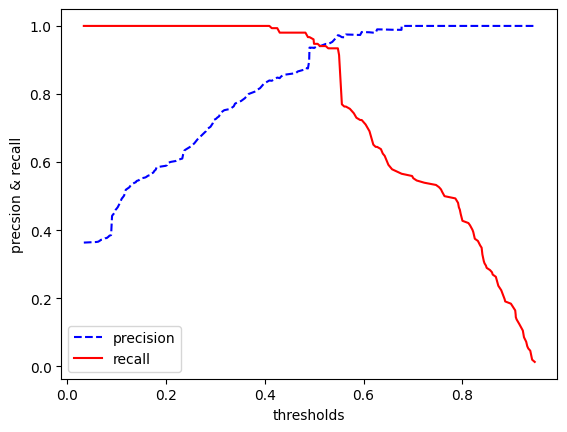

In [62]:
# matplotlib.pyplot.plot
import matplotlib.pyplot as plt

plt.plot(thresholds , precision[:-1] , 'b--' , label="precision")
plt.plot(thresholds , recall[:-1] , 'r-', label="recall")
plt.xlabel("thresholds")
plt.ylabel("precsion & recall")
plt.legend()
plt.show()

In [54]:
len(thresholds)

194

In [55]:
len(recall)

195

In [64]:
# sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve
fprs, tprs, thresholds =roc_curve(y_test, pred_proba[: , 1])

In [66]:
len(fprs) , len(tprs)

(126, 126)

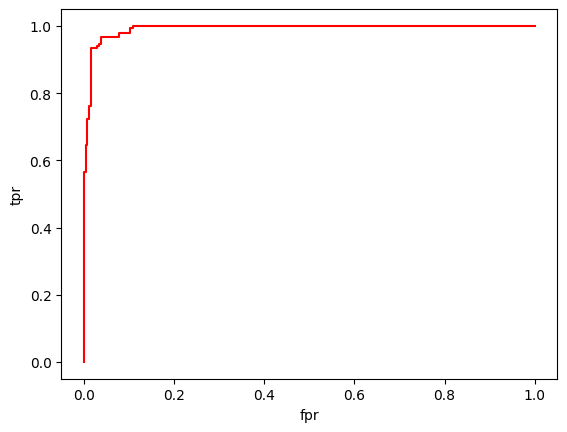

In [67]:
# matplotlib.pyplot.plot
import matplotlib.pyplot as plt

plt.plot(fprs ,tprs ,  color='red')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

In [68]:
# sklearn.metrics.roc_auc_score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred_proba[: , 1])

0.9918381480015829